

# <a name="0">Data Exploration and Visualization for Dining Restaurant</a>
1. <a href="#1">Import required libraries</a>
1. <a href="#2">Read the Dataset</a>
2. <a href="#3">Data investigation</a>
2. <a href="#4">Data Visualisation</a>
3. <a href="#5">Data preprocessing </a>
4. <a href="#6">Training Dataset</a>





#### Feature Columns
- id: unique identifiers for each Diner
- Satisfaction: Dining satisfaction level (Satisfaction, neutral or dissatisfaction)
- Gender: Gender of the diners (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the diners
- Type of Dining: Purpose of the visit to the restaurant (Personal Dining, Business Dining)
- Ambiance: Dining ambiance in the restaurant (Eco, Eco Plus and Business )
- Distance from Home: Distance traveled to reach the restaurant
- Table Comfort': comfort level of the tables in the dining place
- Reservation Convenience': Satisfaction level of the reservation process (Reservation Process, Waiting Time,etc.)
- Food and Drink Quality': Satisfaction level of the food and drinks
- Seating Location': Satisfaction level of seating locations
- WiFi Service: Satisfaction level of the restaurant's WiFi service
- Entertainment Options: Satisfaction level of available entertainment options (Live Music, Events, Games, etc.)
- Online Reservation Support: Satisfaction level of online reservation support
- Ease of Online Booking : Satisfaction level of the online booking process
- Table Service: Satisfaction level of table service
- Space Between Tables: Satisfaction level of the space between dining tables
- Baggage Handling: Satisfaction level of baggage handling (Coat Check, Personal Items Handling, etc.)
- Check-in Service: Satisfaction level of the check-in service (Reception, Reservation Confirmation, etc.)
- Cleanliness: Satisfaction level of cleanliness in the restaurant
- Online Menu Access: Satisfaction level of online menu access (User-Friendly, Detailed, etc.)
- Wait Time for a Table (Departure Delay in Minutes): Minutes delayed when the diners had to wait for a table

> #### Data used [Dining Satisfaction Dataset](https://github.com/amiramomen/dinning_satisfaction/blob/main/satisfaction.csv)
Take Into consideration that (0: (No Answer / Not Applicable); 1-5 (Actual Rating))


## 1. <a name="1">Import required libraries</a>
<a href="#0">Go to top</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



## 2. <a name="2">Read the dataset</a>
(<a href="#0">Go to top</a>)

In [2]:
df = pd.read_csv('./satisfaction.csv')
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Dining,Ambiance,Distance from Home,Table Comfort,Reservation Convenience,...,Entertainment Options,Online support,Ease of Online booking,Table Service,Space Between Tables,Baggage handling,Checkin service,Cleanliness,Online Menu Access,Wait Time for a Table
0,11112,satisfied,Female,Loyal Customer,65,Personal,Eco,265,0,0,...,4,2,3,3,0,3,5,3,2,0
1,110278,satisfied,Male,Loyal Customer,47,Personal,Business,2464,0,0,...,2,2,3,4,4,4,2,3,2,310
2,103199,satisfied,Female,Loyal Customer,15,Personal,Eco,2138,0,0,...,0,2,2,3,3,4,4,4,2,0
3,47462,satisfied,Female,Loyal Customer,60,Personal,Eco,623,0,0,...,4,3,1,1,0,1,4,1,3,0
4,120011,satisfied,Female,Loyal Customer,70,Personal,Eco,354,0,0,...,3,4,2,2,0,2,4,2,5,0



## 3. <a name="3">  Data investigation</a>
(<a href="#0">Go to top</a>)

#### in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows



In [ ]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Dining', 'Ambiance', 'Distance from Home', 'Table Comfort',
       'Reservation Convenience', 'Food and Drink Quality', 'Seating Location',
       'WiFi Service', 'Entertainment Options', 'Online support',
       'Ease of Online booking', 'Table Service', 'Space Between Tables',
       'Baggage handling', 'Checkin service', 'Cleanliness',
       'Online Menu Access', 'Wait Time for a Table'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       129880 non-null  int64 
 1   satisfaction_v2          129880 non-null  object
 2   Gender                   129880 non-null  object
 3   Customer Type            129880 non-null  object
 4   Age                      129880 non-null  int64 
 5   Type of Dining           129880 non-null  object
 6   Ambiance                 129880 non-null  object
 7   Distance from Home       129880 non-null  int64 
 8   Table Comfort            129880 non-null  int64 
 9   Reservation Convenience  129880 non-null  int64 
 10  Food and Drink Quality   129880 non-null  int64 
 11  Seating Location         129880 non-null  int64 
 12  WiFi Service             129880 non-null  int64 
 13  Entertainment Options    129880 non-null  int64 
 14  Online support      

In [ ]:
df.shape

(129880, 23)

In [ ]:
i=1
for column in df.columns:
    print(f"{i}- {column}: Number of unique values {df[column].nunique()}")
    i+=1
    print("==========================================================")

1- id: Number of unique values 129880
2- satisfaction_v2: Number of unique values 2
3- Gender: Number of unique values 2
4- Customer Type: Number of unique values 2
5- Age: Number of unique values 75
6- Type of Dining: Number of unique values 2
7- Ambiance: Number of unique values 3
8- Distance from Home: Number of unique values 5398
9- Table Comfort: Number of unique values 6
10- Reservation Convenience: Number of unique values 6
11- Food and Drink Quality: Number of unique values 6
12- Seating Location: Number of unique values 6
13- WiFi Service: Number of unique values 6
14- Entertainment Options: Number of unique values 6
15- Online support: Number of unique values 6
16- Ease of Online booking: Number of unique values 6
17- Table Service: Number of unique values 6
18- Space Between Tables: Number of unique values 6
19- Baggage handling: Number of unique values 5
20- Checkin service: Number of unique values 6
21- Cleanliness: Number of unique values 6
22- Online Menu Access: Number 

In [ ]:
for column in df.columns:
    if df[column].dtypes != object :
        print(f"{column} : {df[column].unique()}")
        print("====================================")

id : [ 11112 110278 103199 ... 125368    251  84566]
Age : [65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
Distance from Home : [ 265 2464 2138 ... 5832 5120 4260]
Table Comfort : [0 1 4 5 2 3]
Reservation Convenience : [0 1 2 3 4 5]
Food and Drink Quality : [0 1 2 3 4 5]
Seating Location : [2 3 4 1 5 0]
WiFi Service : [2 0 3 4 5 1]
Entertainment Options : [4 2 0 3 5 1]
Online support : [2 3 4 5 1 0]
Ease of Online booking : [3 2 1 5 4 0]
Table Service : [3 4 1 2 5 0]
Space Between Tables : [0 4 3 2 5 1]
Baggage handling : [3 4 1 2 5]
Checkin service : [5 2 4 3 1 0]
Cleanliness : [3 4 1 2 5 0]
Online Menu Access : [2 3 5 4 1 0]
Wait Time for a Table : [   0  310   17   30   47   40    5    2   34    4   13  427   15   10
   16   11    9    1   19   35   14    6   27   20    3   90   12   68
   93    7   29 

In [ ]:
for column in df.columns:
    if df[column].dtypes == object :
        print(f"{column} : {df[column].unique()}")
        print("====================================")

satisfaction_v2 : ['satisfied' 'neutral or dissatisfied']
Gender : ['Female' 'Male']
Customer Type : ['Loyal Customer' 'disloyal Customer']
Type of Dining : ['Personal' 'Business']
Ambiance : ['Eco' 'Business' 'Eco Plus']


In [ ]:
for column in df.columns:
    if df[column].nunique() <= 10 :
        print(f"{df[column].value_counts()}")
        print("====================================") #> data almost balanced

satisfaction_v2
satisfied                  71087
neutral or dissatisfied    58793
Name: count, dtype: int64
Gender
Female    65899
Male      63981
Name: count, dtype: int64
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
Type of Dining
Business    89693
Personal    40187
Name: count, dtype: int64
Ambiance
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
Table Comfort
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: count, dtype: int64
Reservation Convenience
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: count, dtype: int64
Food and Drink Quality
3    28150
4    27216
2    27146
1    21076
5    20347
0     5945
Name: count, dtype: int64
Seating Location
3    33546
4    30088
2    24518
1    22565
5    19161
0        2
Name: count, dtype: int64
WiFi Service
4    31560
5    28830
3    27602
2    27045
1    14711
0      132
Name: count, dtype: int64
Entertainment 

In [ ]:
df['satisfaction_v2'].value_counts(normalize=True)*100 #balanced

satisfaction_v2
satisfied                  54.73283
neutral or dissatisfied    45.26717
Name: proportion, dtype: float64

In [ ]:
df.describe()

,id,Age,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,Seating Location,WiFi Service,Entertainment Options,Online support,Ease of Online booking,Table Service,Space Between Tables,Baggage handling,Checkin service,Cleanliness,Online Menu Access,Wait Time for a Table
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


In [ ]:
df[df['Wait Time for a Table']>12]#> right skewness

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Dining,Ambiance,Distance from Home,Table Comfort,Reservation Convenience,...,Entertainment Options,Online support,Ease of Online booking,Table Service,Space Between Tables,Baggage handling,Checkin service,Cleanliness,Online Menu Access,Wait Time for a Table
1,110278,satisfied,Male,Loyal Customer,47,Personal,Business,2464,0,0,...,2,2,3,4,4,4,2,3,2,310
6,32838,satisfied,Female,Loyal Customer,66,Personal,Eco,227,0,0,...,5,5,5,5,0,5,5,5,3,17
9,7243,satisfied,Male,Loyal Customer,22,Personal,Eco,1556,0,0,...,0,2,2,2,4,5,3,4,2,30
10,89429,satisfied,Female,Loyal Customer,58,Personal,Eco,104,0,0,...,3,3,3,3,0,1,2,3,5,47
14,32848,satisfied,Female,Loyal Customer,47,Personal,Eco,84,0,1,...,2,1,5,5,0,5,2,5,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129870,22432,satisfied,Female,disloyal Customer,70,Personal,Eco,1674,5,4,...,5,5,5,3,2,4,5,4,5,54
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal,Business,2087,2,3,...,1,1,3,2,3,3,1,2,1,174
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal,Eco,2320,3,0,...,2,2,4,4,3,4,2,3,2,155
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal,Eco,2450,3,2,...,2,2,3,3,2,3,2,1,2,193


In [ ]:
df.isnull().sum() #> no null

id                         0
satisfaction_v2            0
Gender                     0
Customer Type              0
Age                        0
Type of Dining             0
Ambiance                   0
Distance from Home         0
Table Comfort              0
Reservation Convenience    0
Food and Drink Quality     0
Seating Location           0
WiFi Service               0
Entertainment Options      0
Online support             0
Ease of Online booking     0
Table Service              0
Space Between Tables       0
Baggage handling           0
Checkin service            0
Cleanliness                0
Online Menu Access         0
Wait Time for a Table      0
dtype: int64

In [ ]:
df[df.duplicated()] #> no duplicates

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Dining,Ambiance,Distance from Home,Table Comfort,Reservation Convenience,...,Entertainment Options,Online support,Ease of Online booking,Table Service,Space Between Tables,Baggage handling,Checkin service,Cleanliness,Online Menu Access,Wait Time for a Table


In [ ]:
for column in df.columns:
        print(f"{df.groupby([column])['satisfaction_v2'].value_counts()}")
        print("====================================")

id      satisfaction_v2        
1       neutral or dissatisfied    1
2       satisfied                  1
3       satisfied                  1
4       satisfied                  1
5       satisfied                  1
                                  ..
129876  neutral or dissatisfied    1
129877  neutral or dissatisfied    1
129878  neutral or dissatisfied    1
129879  satisfied                  1
129880  satisfied                  1
Name: count, Length: 129880, dtype: int64
satisfaction_v2
neutral or dissatisfied    58793
satisfied                  71087
Name: count, dtype: int64
Gender  satisfaction_v2        
Female  satisfied                  42928
        neutral or dissatisfied    22971
Male    neutral or dissatisfied    35822
        satisfied                  28159
Name: count, dtype: int64
Customer Type      satisfaction_v2        
Loyal Customer     satisfied                  65387
                   neutral or dissatisfied    40713
disloyal Customer  neutral or dissatisfied

Table Service  satisfaction_v2        
0              neutral or dissatisfied        5
1              neutral or dissatisfied     9735
               satisfied                   3530
2              neutral or dissatisfied    11324
               satisfied                   5850
3              neutral or dissatisfied    15937
               satisfied                  11100
4              satisfied                  26320
               neutral or dissatisfied    14355
5              satisfied                  24287
               neutral or dissatisfied     7437
Name: count, dtype: int64
Space Between Tables  satisfaction_v2        
0                     satisfied                    307
                      neutral or dissatisfied      137
1                     neutral or dissatisfied     7980
                      satisfied                   3161
2                     neutral or dissatisfied    13559
                      satisfied                   8186
3                     neutral o

In [ ]:
df.groupby(['Gender','Customer Type'])['satisfaction_v2'].value_counts() #> men always dissatisfied 😂

Gender  Customer Type      satisfaction_v2        
Female  Loyal Customer     satisfied                  39978
                           neutral or dissatisfied    13078
        disloyal Customer  neutral or dissatisfied     9893
                           satisfied                   2950
Male    Loyal Customer     neutral or dissatisfied    27635
                           satisfied                  25409
        disloyal Customer  neutral or dissatisfied     8187
                           satisfied                   2750
Name: count, dtype: int64

In [ ]:
df.groupby(['Gender','Type of Dining'])['satisfaction_v2'].value_counts() #> women always satisfied 🫡

Gender  Type of Dining  satisfaction_v2        
Female  Business        satisfied                  26223
                        neutral or dissatisfied    19571
        Personal        satisfied                  16705
                        neutral or dissatisfied     3400
Male    Business        satisfied                  26133
                        neutral or dissatisfied    17766
        Personal        neutral or dissatisfied    18056
                        satisfied                   2026
Name: count, dtype: int64

In [ ]:
df.groupby(['Gender','Ambiance'])['satisfaction_v2'].value_counts() # no extra info

Gender  Ambiance  satisfaction_v2        
Female  Business  satisfied                  22529
                  neutral or dissatisfied     8734
        Eco       satisfied                  17529
                  neutral or dissatisfied    12141
        Eco Plus  satisfied                   2870
                  neutral or dissatisfied     2096
Male    Business  satisfied                  21566
                  neutral or dissatisfied     9331
        Eco       neutral or dissatisfied    23195
                  satisfied                   5444
        Eco Plus  neutral or dissatisfied     3296
                  satisfied                   1149
Name: count, dtype: int64

In [ ]:
df.groupby(['Customer Type','Type of Dining'])['satisfaction_v2'].value_counts() #> disloyal always dissatisfied 🥲

Customer Type      Type of Dining  satisfaction_v2        
Loyal Customer     Business        satisfied                  46688
                                   neutral or dissatisfied    19426
                   Personal        neutral or dissatisfied    21287
                                   satisfied                  18699
disloyal Customer  Business        neutral or dissatisfied    17911
                                   satisfied                   5668
                   Personal        neutral or dissatisfied      169
                                   satisfied                     32
Name: count, dtype: int64

In [ ]:
df.groupby(['Gender','Food and Drink Quality'])['satisfaction_v2'].value_counts()#> women don't care about quality😨

Gender  Food and Drink Quality  satisfaction_v2        
Female  0                       satisfied                   2787
                                neutral or dissatisfied      366
        1                       satisfied                   6607
                                neutral or dissatisfied     3741
        2                       satisfied                   7180
                                neutral or dissatisfied     5321
        3                       satisfied                   7301
                                neutral or dissatisfied     5858
        4                       satisfied                   9538
                                neutral or dissatisfied     5486
        5                       satisfied                   9515
                                neutral or dissatisfied     2199
Male    0                       satisfied                   1846
                                neutral or dissatisfied      946
        1                       ne

###  

## 4. <a name="4">Data Visualisation</a>
(<a href="#0">Go to top</a>)
- Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
    - Univariate analysis
        > - Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
        > - Categorical variable : Bar chart showing frequency in each category
    - Bivariate analysis
        > - Continous & Continous : Scatter plots to know how continous variables interact with each other
        > - Categorical & Categorical : Stacked column chart to show how the frequencies are spread between two   categorical variables
        > - Categorical & Continous : Boxplots charts
- Detect outliers

In [15]:
numeric_columns = list(df.select_dtypes(include='number').columns)[1:] #exclude id
categorical_columns = list(df.select_dtypes(include="object").columns) [1:] #exclude lable

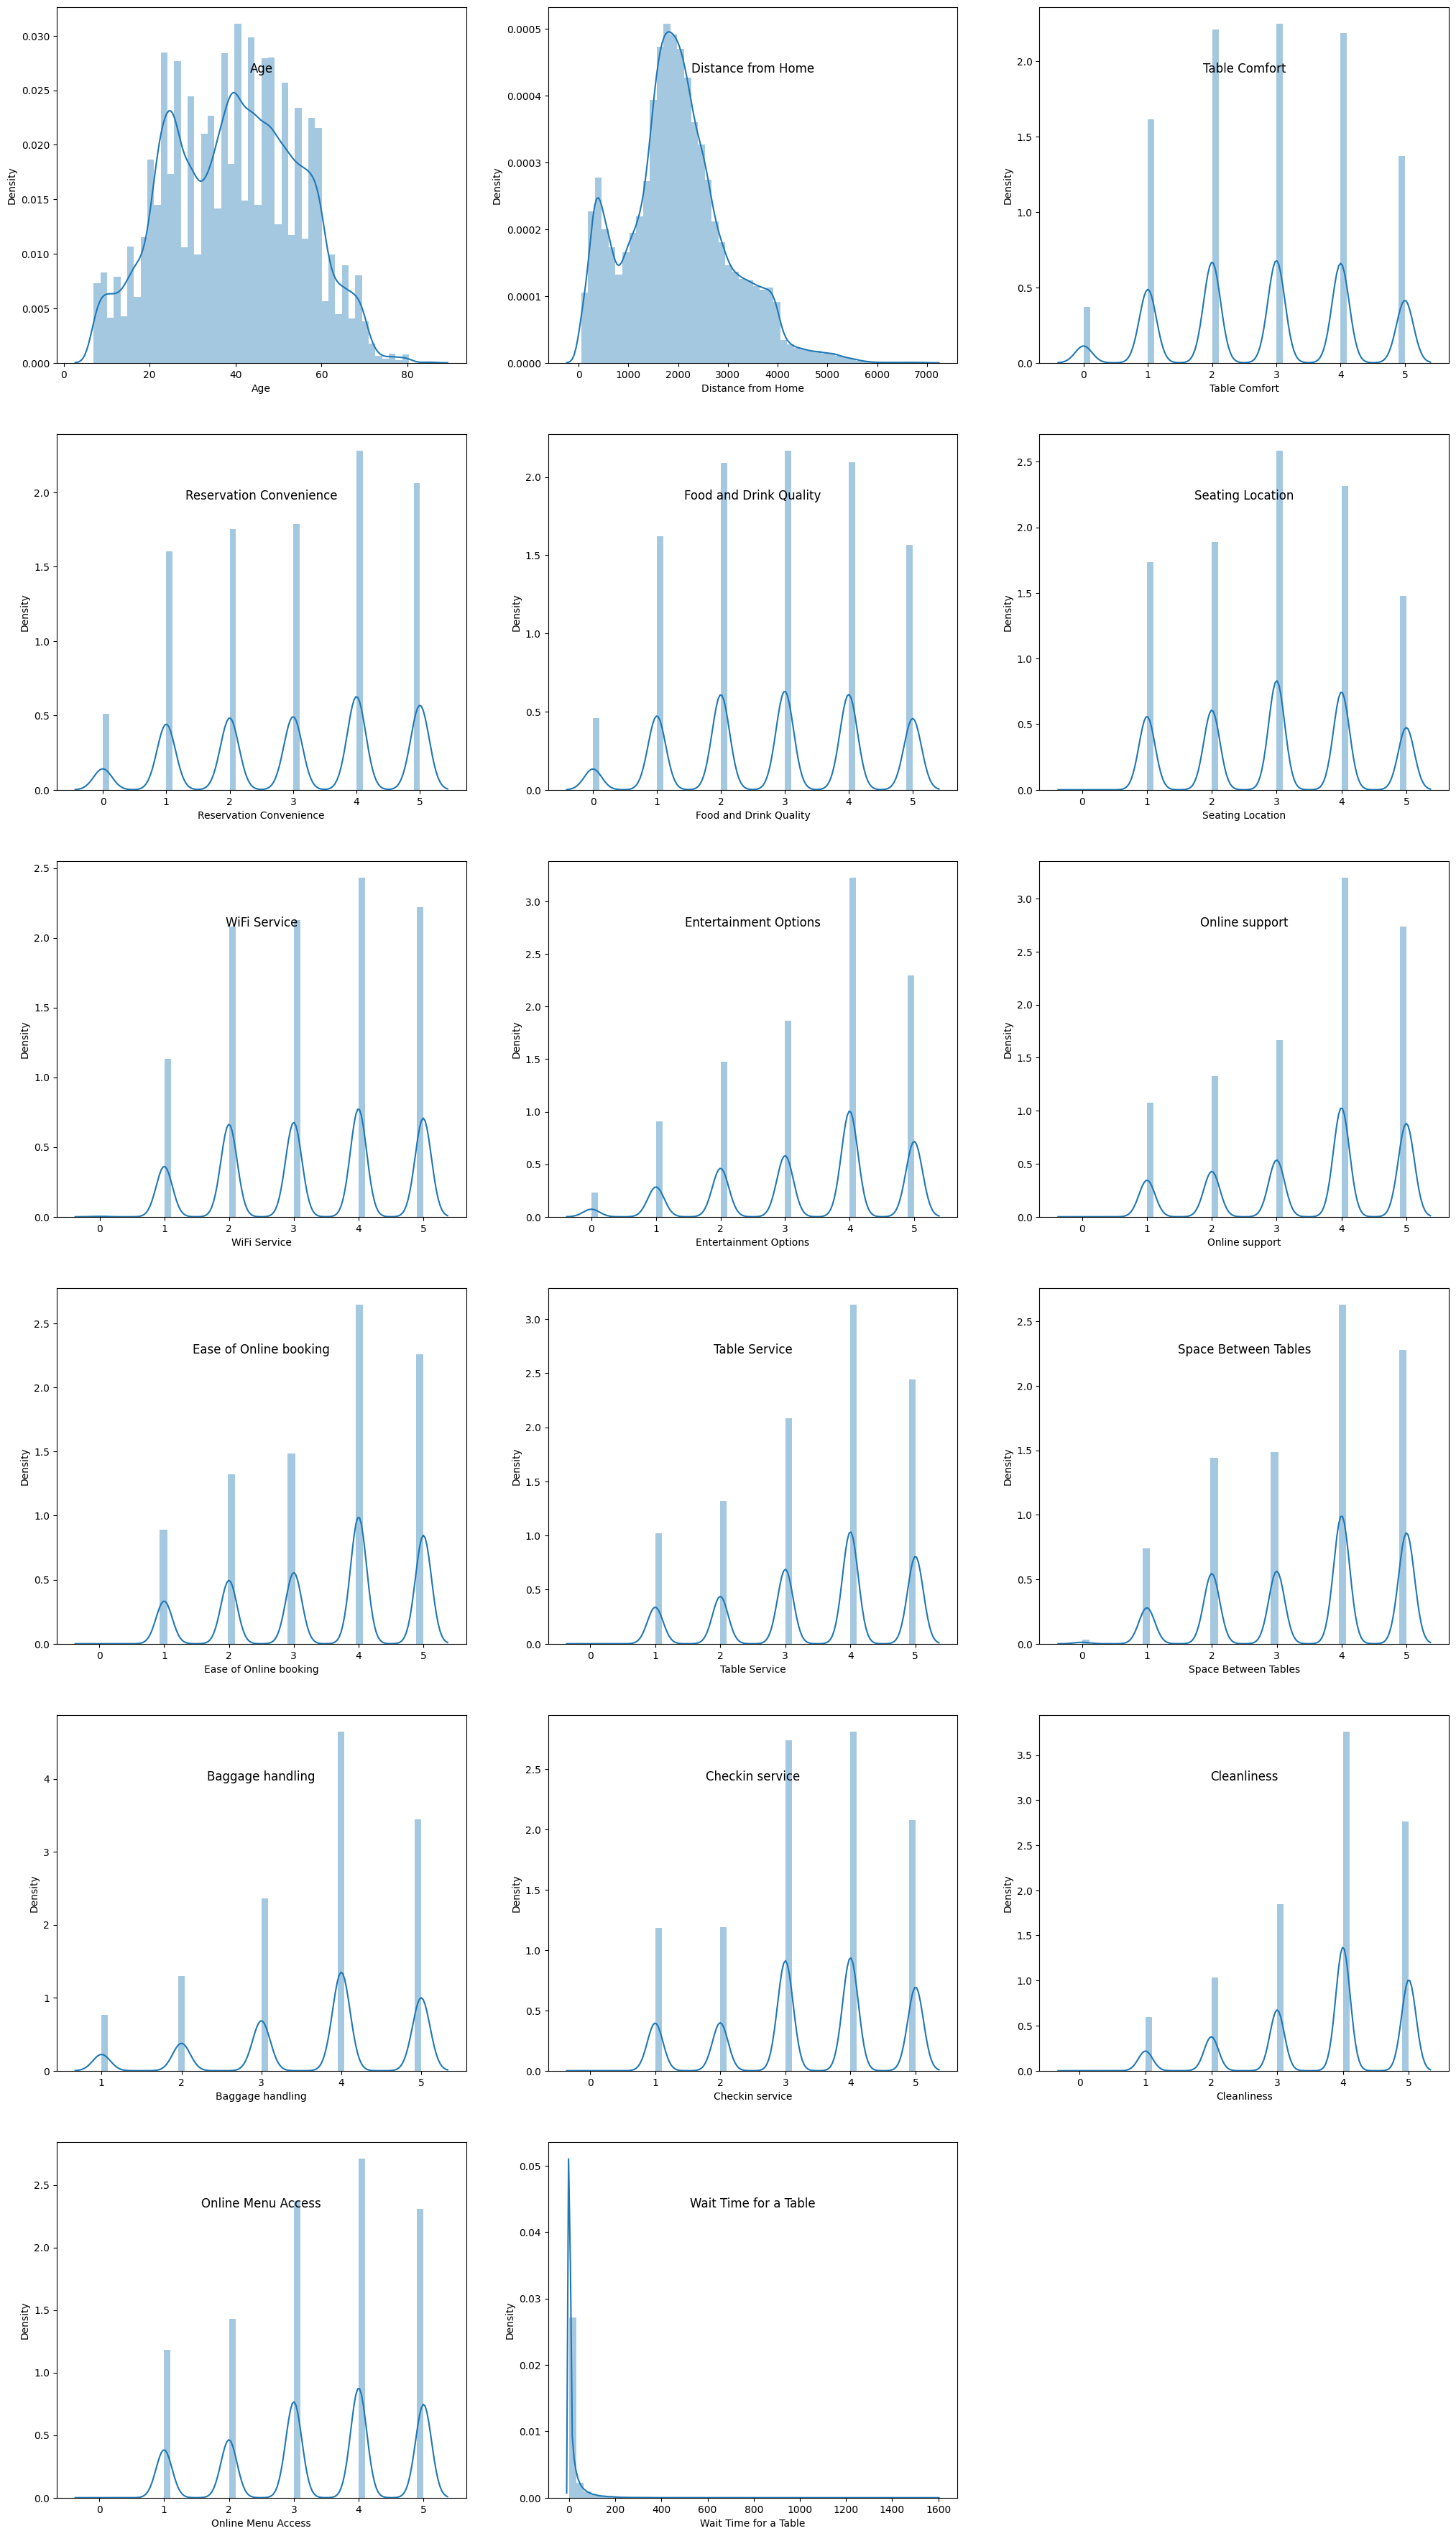

In [ ]:
fig, ax=plt.subplots(figsize=(25, 45))
x=1
for col in df[numeric_columns]:
  plt.subplot(6,3,x)
  sns.distplot(df[col])
  plt.title(col,y=0.8)
  x+=1


###    

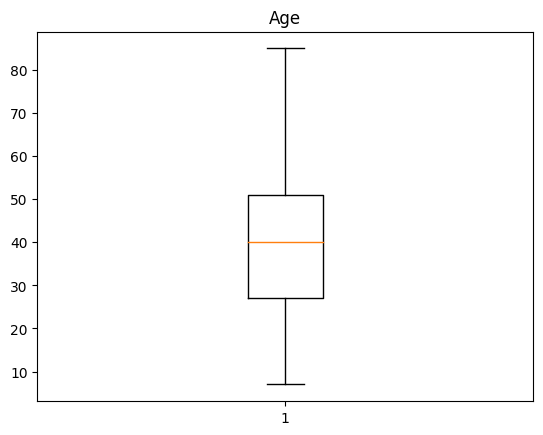

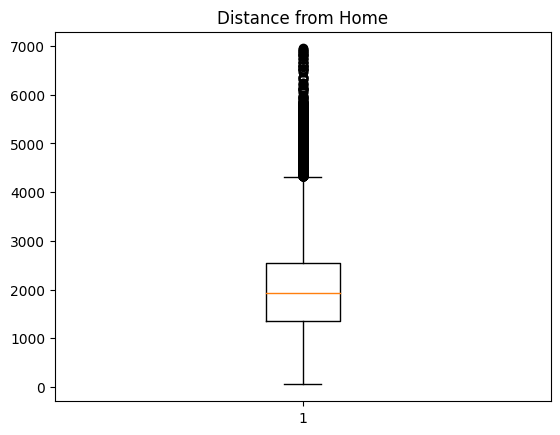

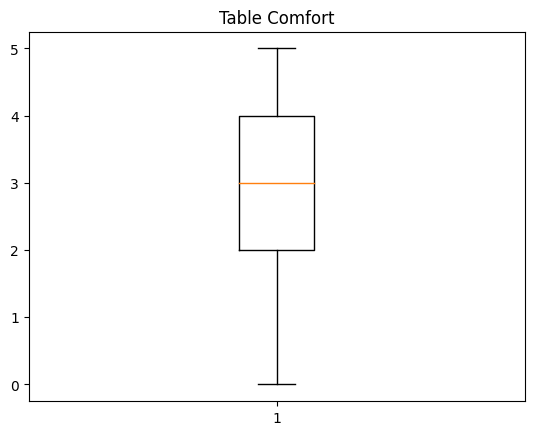

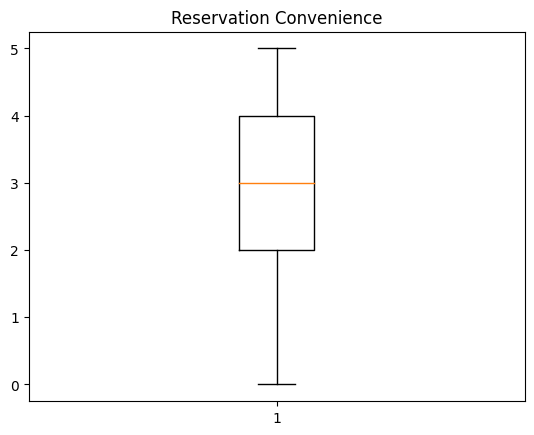

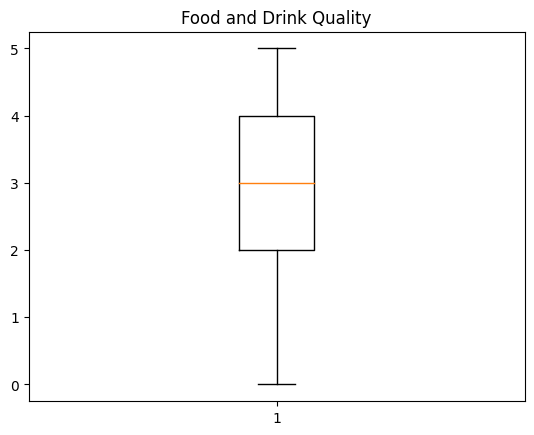

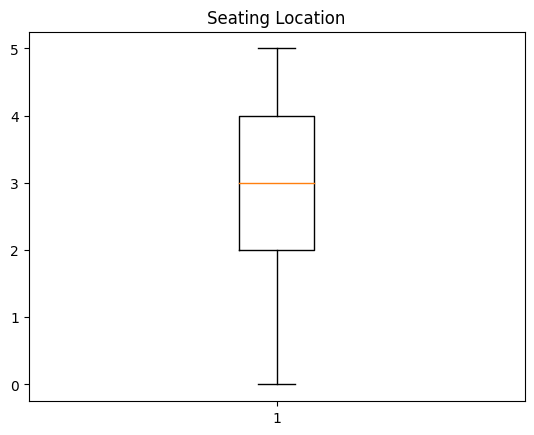

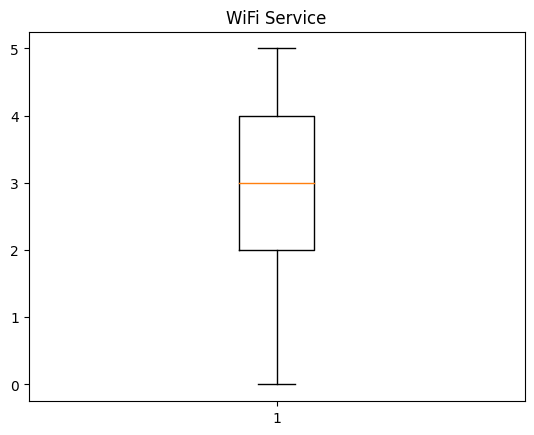

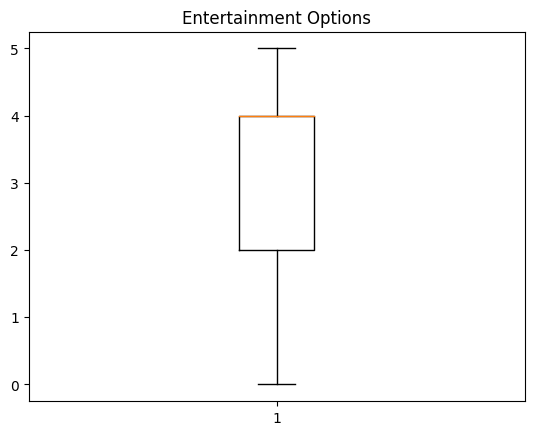

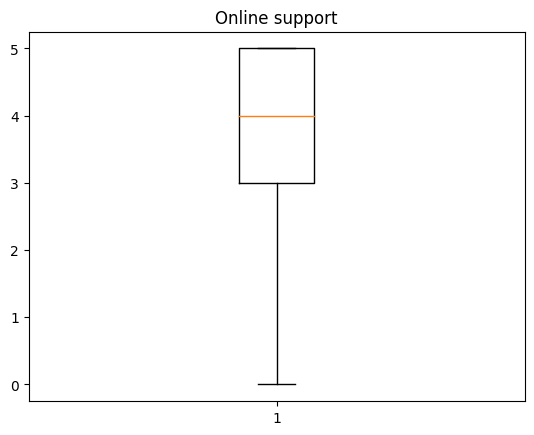

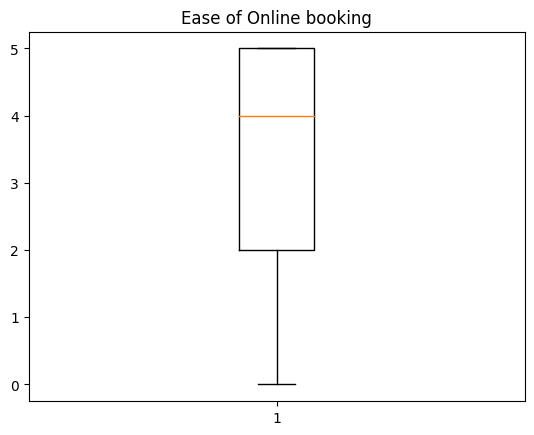

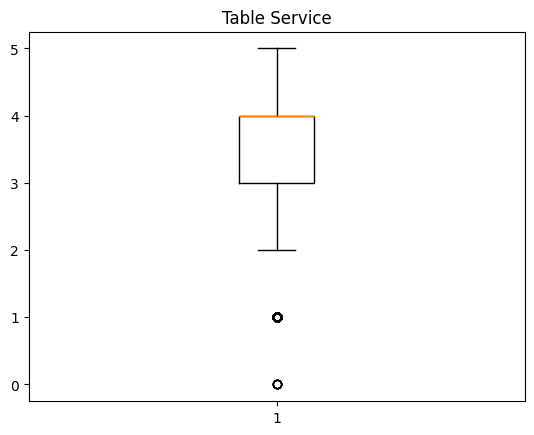

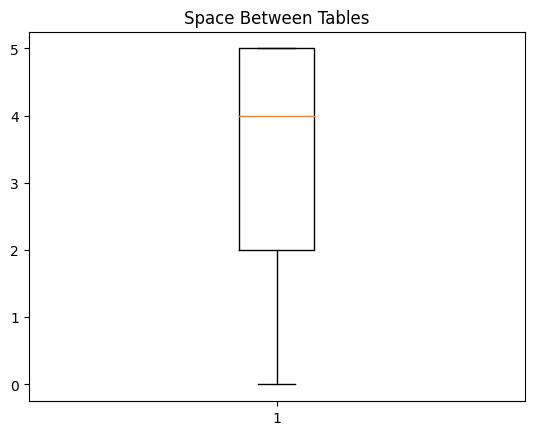

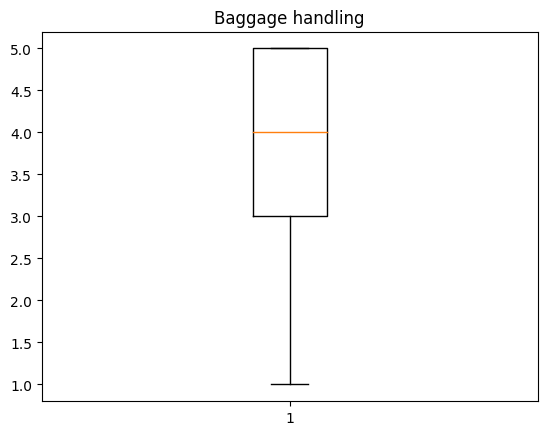

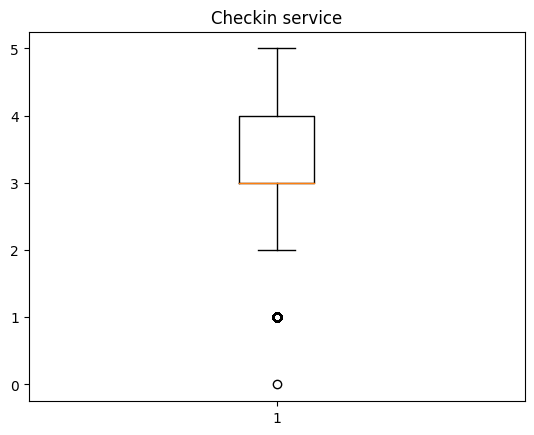

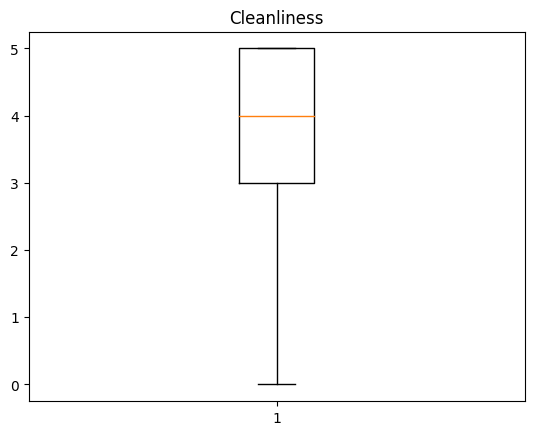

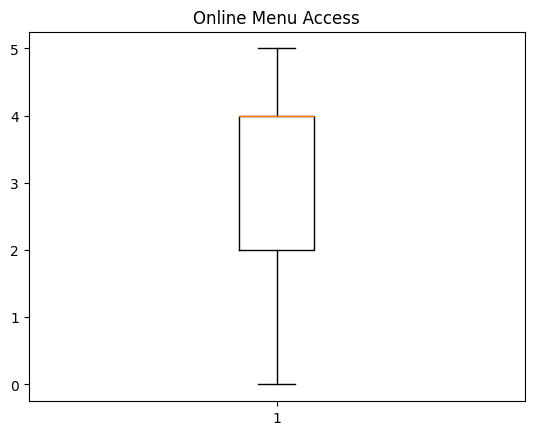

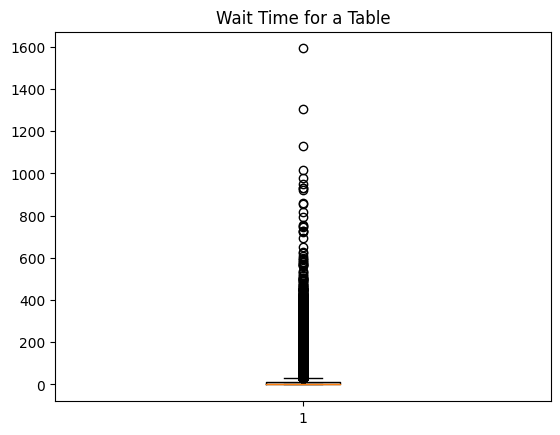

In [ ]:
for i in df[numeric_columns]:
  plt.title(i)
  plt.boxplot(df[i])
  plt.show()

####  

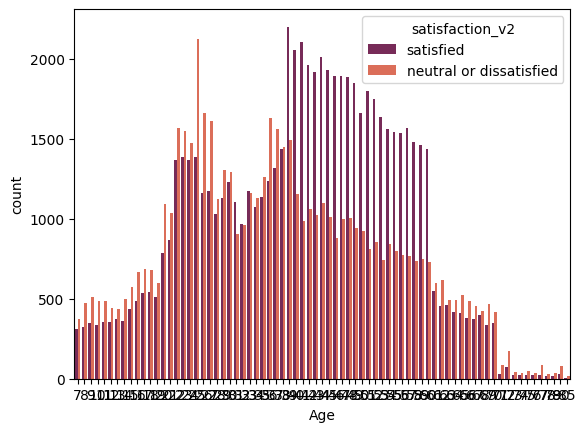

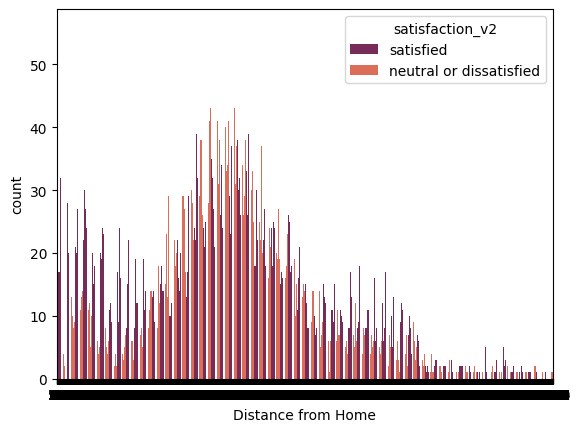

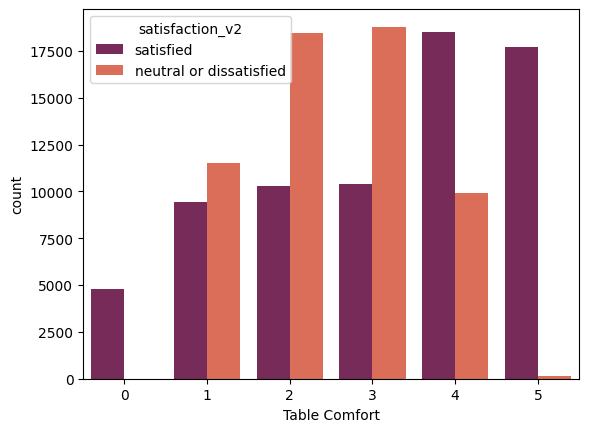

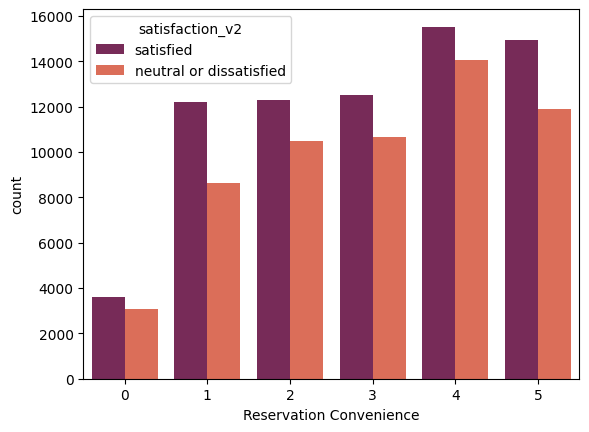

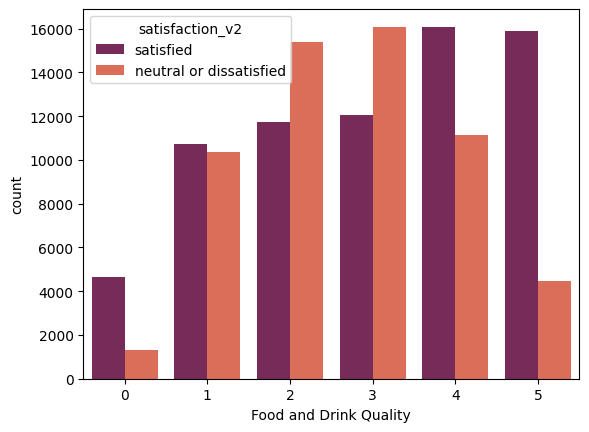

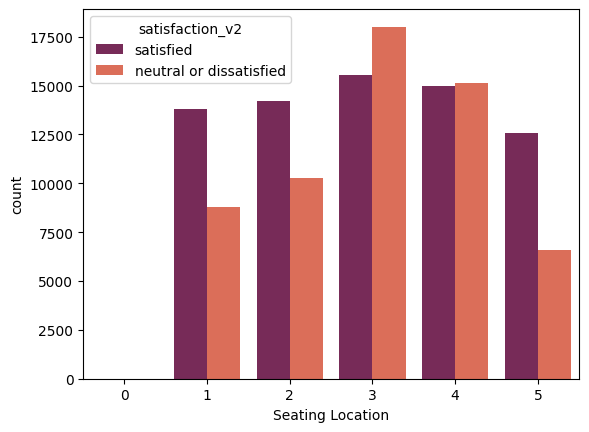

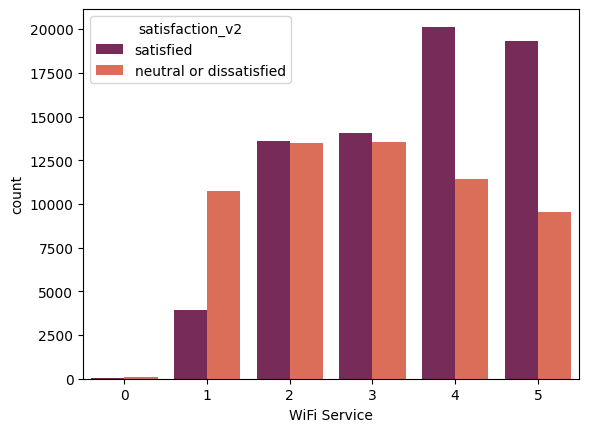

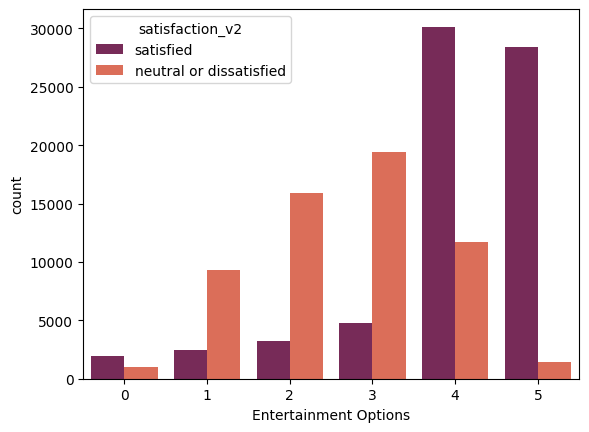

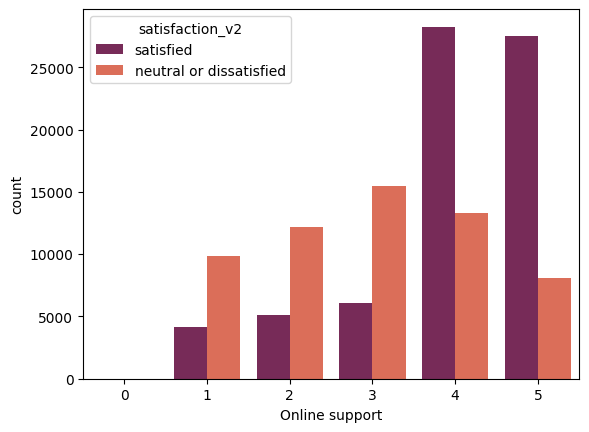

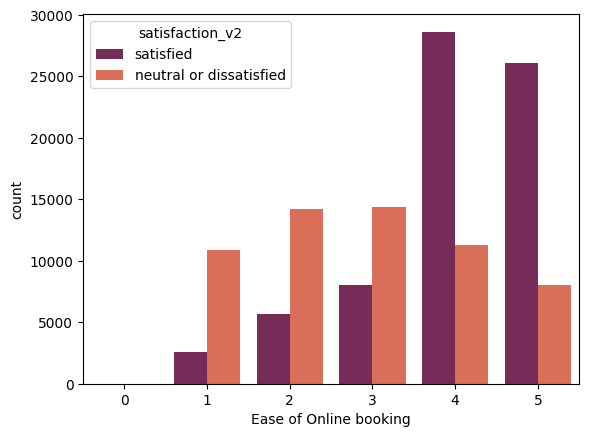

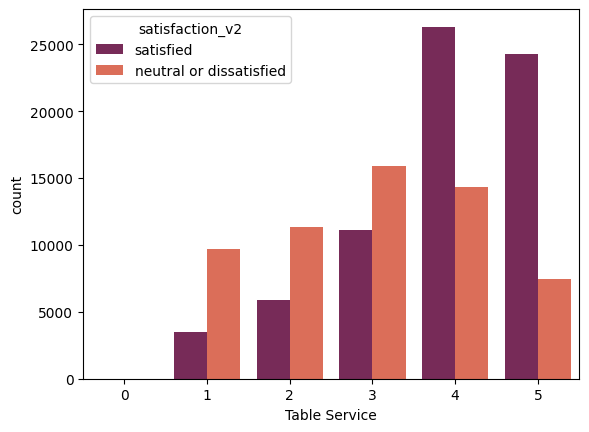

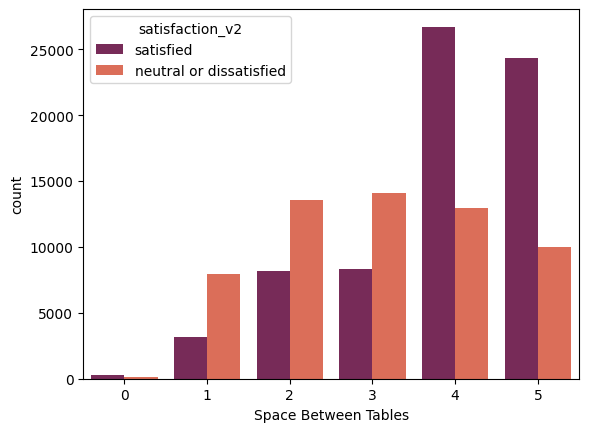

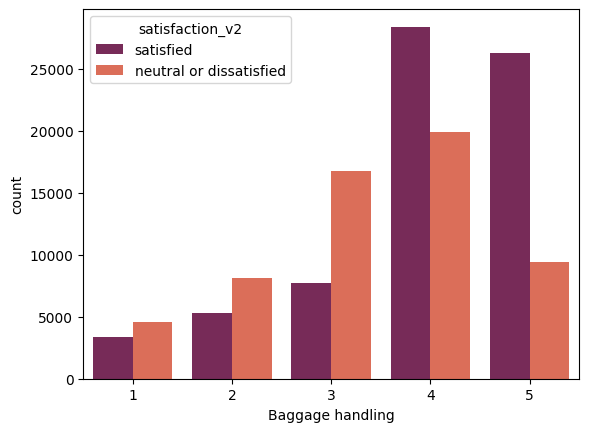

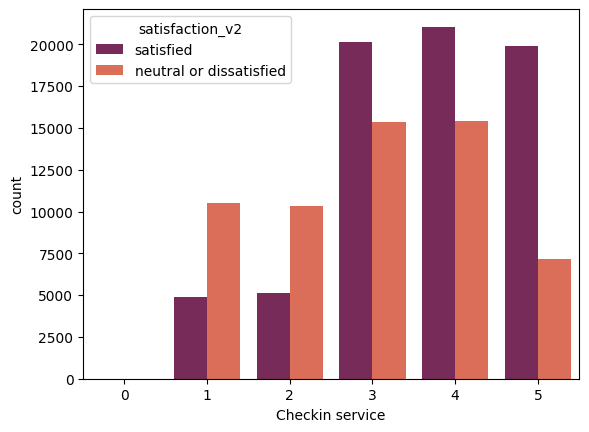

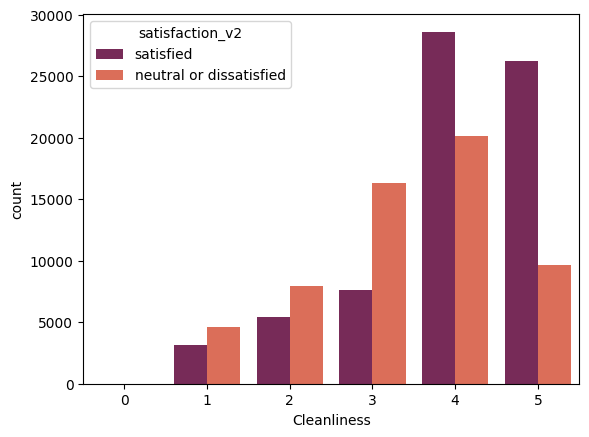

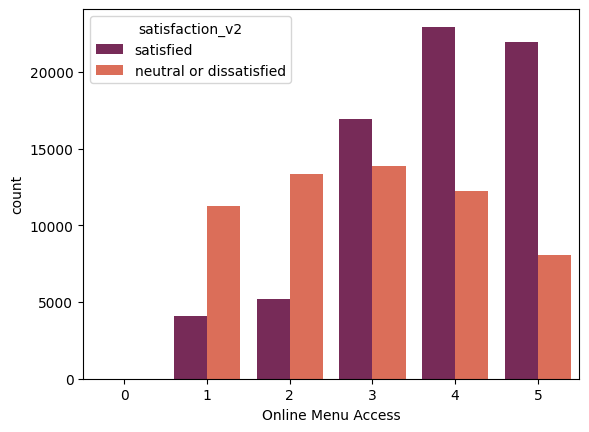

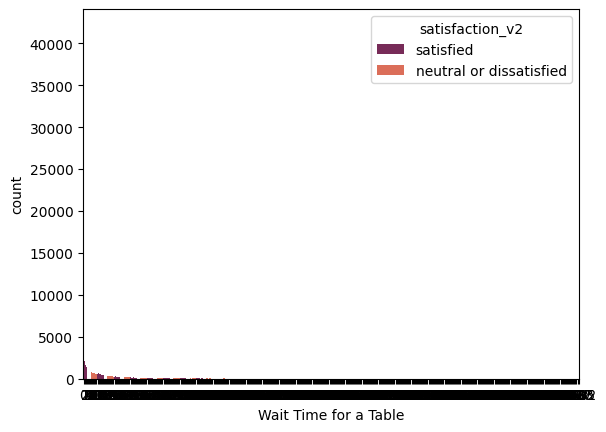

In [ ]:
for i in range(len(numeric_columns)):
    sns.countplot(data = df, x = numeric_columns[i], palette="rocket",hue='satisfaction_v2')
    plt.show()

####  

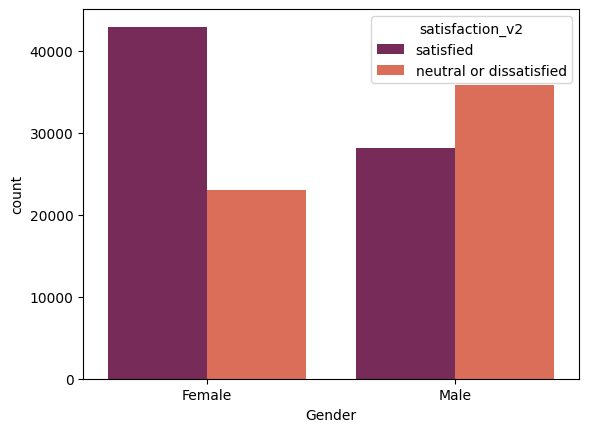

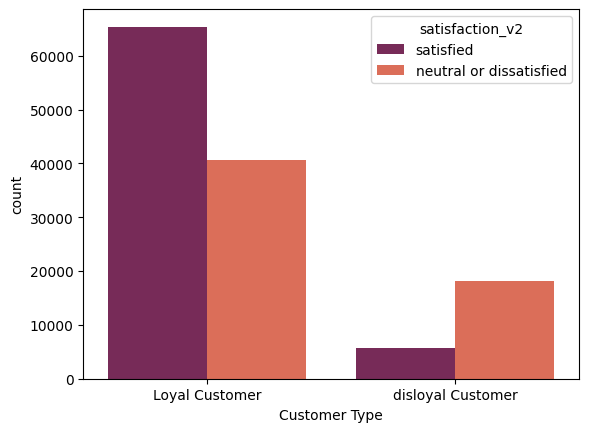

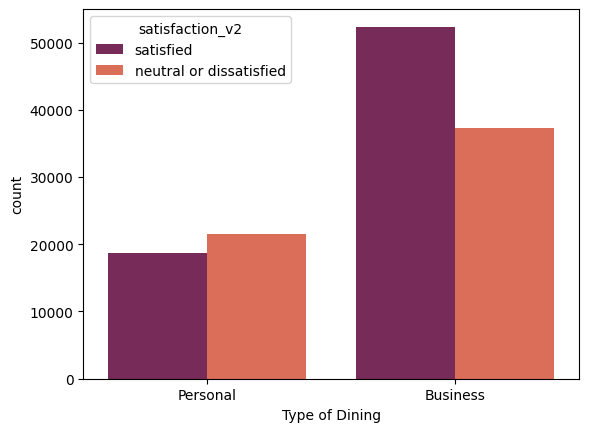

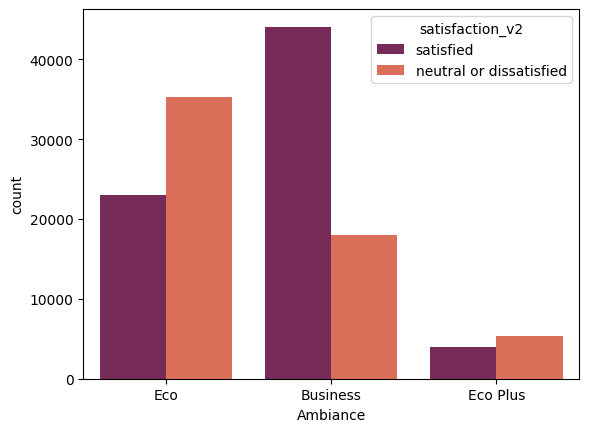

In [ ]:
for i in range(len(categorical_columns)):
    sns.countplot(data = df, x = categorical_columns[i], palette="rocket",hue='satisfaction_v2')
    plt.show()

In [3]:
df_corr=df.select_dtypes(include="number")

<Axes: >

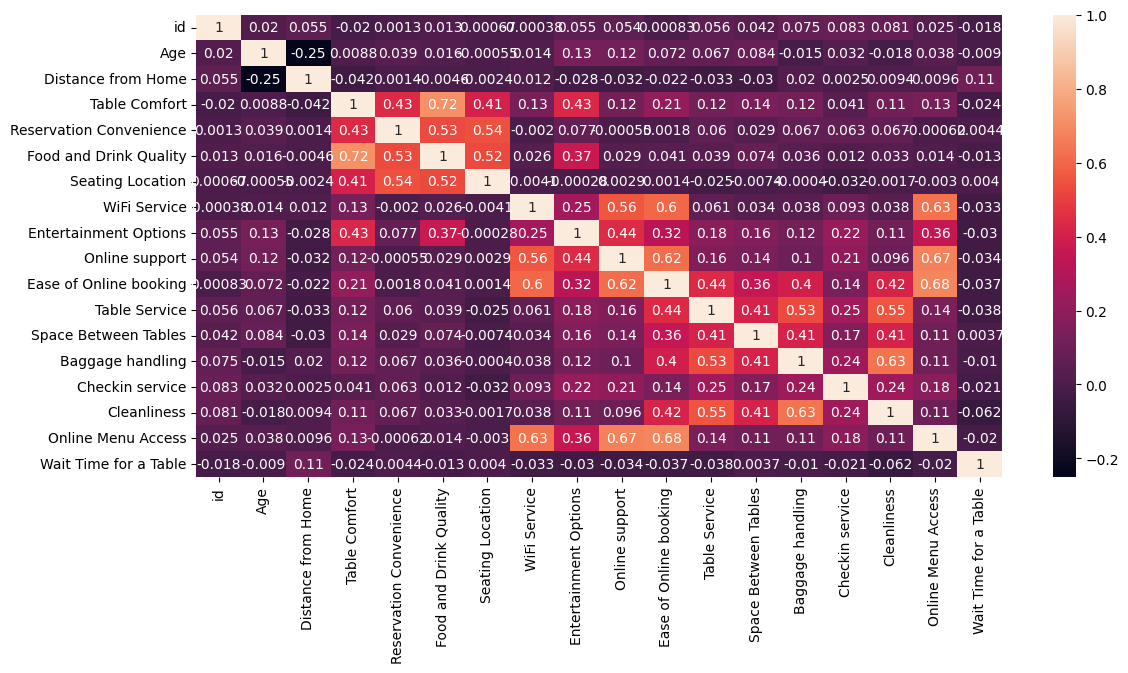

In [ ]:
plt.figure(figsize=(13,6))
sns.heatmap(data=df_corr.corr() ,
                annot=True ,annot_kws={"size":10})

<Axes: xlabel='Distance from Home', ylabel='Wait Time for a Table'>

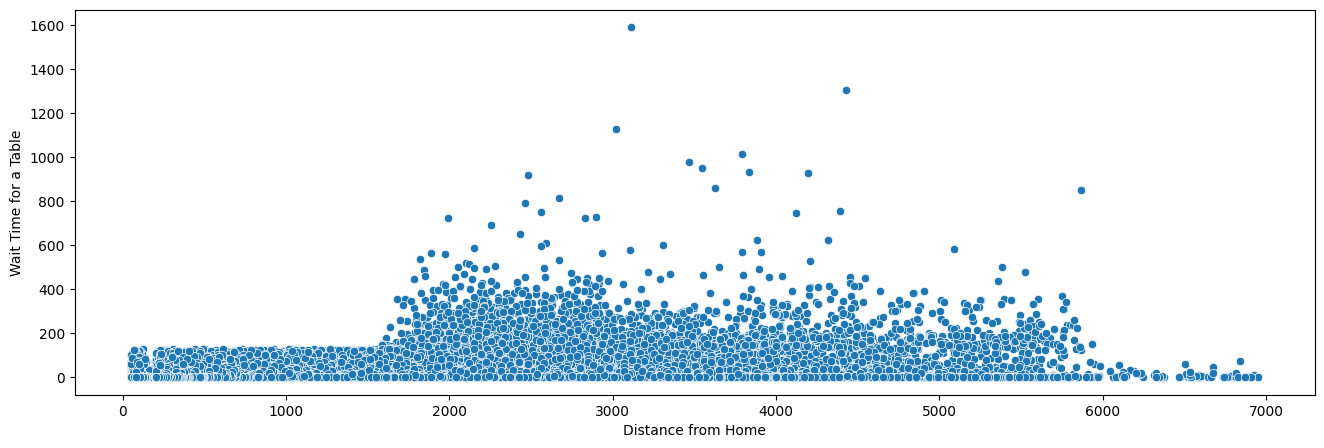

In [ ]:
fig = plt.figure(figsize=(16,5))
sns.scatterplot(y=df['Wait Time for a Table'], x=df['Distance from Home']) #no insight

In [4]:
df_corr['satisfaction']=df['satisfaction_v2'].replace({'satisfied':1,'neutral or dissatisfied':0})

<Axes: >

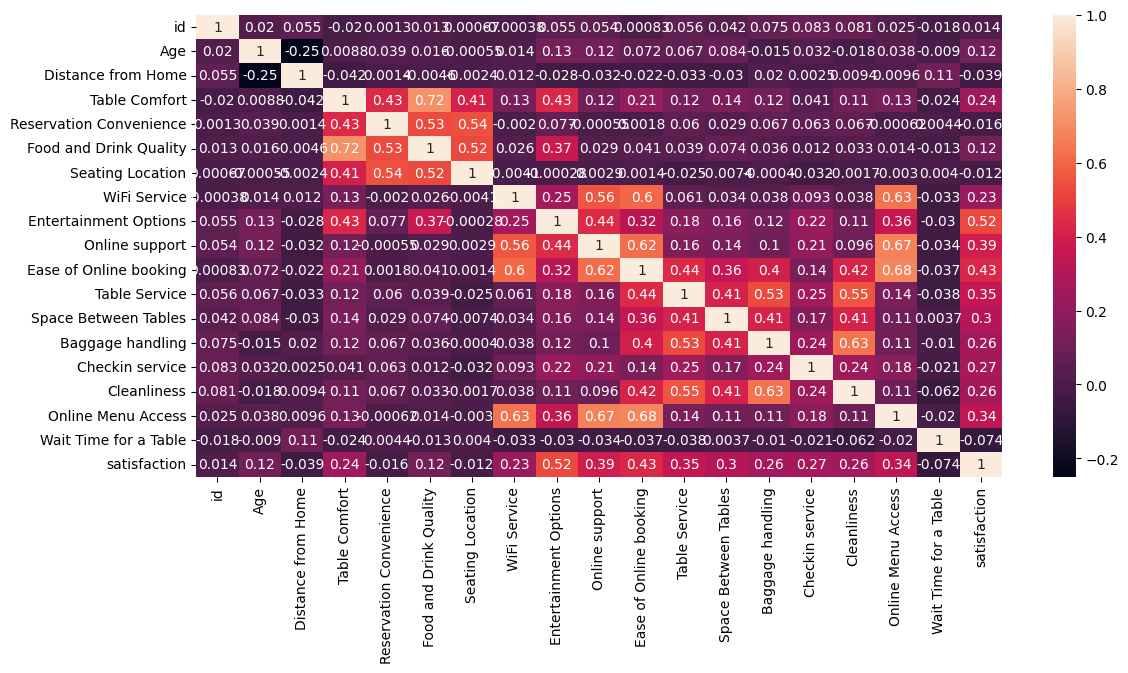

In [5]:
plt.figure(figsize=(13,6))
sns.heatmap(data=df_corr.corr() ,
                annot=True ,annot_kws={"size":10})

###

***

### 📝 **Conclusions:**

***
- The person who collected the data shouldn't have used 0: (No Answer / Not Applicable) because it might be misleading. There are cases where the rate is 0 (like Food and Drink Quality), and the label is "satisfied," which does not make sense. No answer should be treated as NaN and then imputed.
- The columns with discrete values are categorical in the first place.
- There is right skewness (outliers) in `Distance from Home` and `Wait Time for a Table`
- There is a correlation between `WiFi Service` and any online service
- The columns with ratings from 0 to 5 will not need to be encoded because they're ordinal.
- The other categorical columns will undergo One-Hot Encoding (OHE).
- There is no strong relation between `Age` and any online service
- There is a relationship between `Food and Drink Quality` and `Table Comfort`
- Most men are dissatisfied and most women are satisfied
- Most Disloyal Customer are dissatisfied and most Loyal Customer are satisfied

***

###  

## 5. <a name="5">Data preprocessing</a>
(<a href="#0">Go to top</a>)
#### Define below all the issues that  found in the previous part      
    1-  Change column satisfaction_v2 name  
    2-  Change [neutral or dissatisfied] to dissatisfied
    2-  Drop id
    3-  Categorical Data Encoding  
    4-  Normalize [ Age , Distance from Home , Wait Time for a Table ]


In [7]:
df_prepro = df.copy()
df_prepro.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Dining,Ambiance,Distance from Home,Table Comfort,Reservation Convenience,...,Entertainment Options,Online support,Ease of Online booking,Table Service,Space Between Tables,Baggage handling,Checkin service,Cleanliness,Online Menu Access,Wait Time for a Table
0,11112,satisfied,Female,Loyal Customer,65,Personal,Eco,265,0,0,...,4,2,3,3,0,3,5,3,2,0
1,110278,satisfied,Male,Loyal Customer,47,Personal,Business,2464,0,0,...,2,2,3,4,4,4,2,3,2,310
2,103199,satisfied,Female,Loyal Customer,15,Personal,Eco,2138,0,0,...,0,2,2,3,3,4,4,4,2,0
3,47462,satisfied,Female,Loyal Customer,60,Personal,Eco,623,0,0,...,4,3,1,1,0,1,4,1,3,0
4,120011,satisfied,Female,Loyal Customer,70,Personal,Eco,354,0,0,...,3,4,2,2,0,2,4,2,5,0


- ####   Change column satisfaction_v2 name   

In [8]:
df_prepro.rename(columns={"satisfaction_v2": "satisfaction"},inplace=True)

In [9]:
df_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       129880 non-null  int64 
 1   satisfaction             129880 non-null  object
 2   Gender                   129880 non-null  object
 3   Customer Type            129880 non-null  object
 4   Age                      129880 non-null  int64 
 5   Type of Dining           129880 non-null  object
 6   Ambiance                 129880 non-null  object
 7   Distance from Home       129880 non-null  int64 
 8   Table Comfort            129880 non-null  int64 
 9   Reservation Convenience  129880 non-null  int64 
 10  Food and Drink Quality   129880 non-null  int64 
 11  Seating Location         129880 non-null  int64 
 12  WiFi Service             129880 non-null  int64 
 13  Entertainment Options    129880 non-null  int64 
 14  Online support      

- ####   Change [neutral or dissatisfied] to dissatisfied

In [10]:
df_prepro['satisfaction'].replace({'neutral or dissatisfied': 'dissatisfied'},inplace=True)

- ####   Drop id

In [11]:
df_prepro.drop(columns='id',inplace=True)

In [12]:
df_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   satisfaction             129880 non-null  object
 1   Gender                   129880 non-null  object
 2   Customer Type            129880 non-null  object
 3   Age                      129880 non-null  int64 
 4   Type of Dining           129880 non-null  object
 5   Ambiance                 129880 non-null  object
 6   Distance from Home       129880 non-null  int64 
 7   Table Comfort            129880 non-null  int64 
 8   Reservation Convenience  129880 non-null  int64 
 9   Food and Drink Quality   129880 non-null  int64 
 10  Seating Location         129880 non-null  int64 
 11  WiFi Service             129880 non-null  int64 
 12  Entertainment Options    129880 non-null  int64 
 13  Online support           129880 non-null  int64 
 14  Ease of Online booki

In [ ]:
df_prepro.to_csv('./df_undivided_prepared.csv',index=False) #df not encoded but prepared and undivided

 - ####   Categorical Data Encoding  
    >-  Split data into Featuers and Label
    >-  Apply LabelEncoder to encode the Label column
    >-  Apply OneHotEncoder to encode the categorical Features
    >-  Concate one-hot encoded Featuers and encoded Label
    

In [13]:
featuers = df_prepro.loc[:, df_prepro.columns != "satisfaction"].copy()
label = df_prepro.loc[:, "satisfaction"].copy()

In [ ]:
label

0            satisfied
1            satisfied
2            satisfied
3            satisfied
4            satisfied
              ...     
129875       satisfied
129876    dissatisfied
129877    dissatisfied
129878    dissatisfied
129879    dissatisfied
Name: satisfaction, Length: 129880, dtype: object

In [ ]:
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)
label = pd.DataFrame(label, index=df.index, columns=["satisfaction"])

In [ ]:
label.value_counts() , label_encoder.classes_

(satisfaction
 1               71087
 0               58793
 Name: count, dtype: int64,
 array(['dissatisfied', 'satisfied'], dtype=object))

In [ ]:
label

,satisfaction
0,1
1,1
2,1
3,1
4,1
...,...
129875,1
129876,0
129877,0
129878,0


In [ ]:
featuers

,Gender,Customer Type,Age,Type of Dining,Ambiance,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,Seating Location,...,Entertainment Options,Online support,Ease of Online booking,Table Service,Space Between Tables,Baggage handling,Checkin service,Cleanliness,Online Menu Access,Wait Time for a Table
0,Female,Loyal Customer,65,Personal,Eco,265,0,0,0,2,...,4,2,3,3,0,3,5,3,2,0
1,Male,Loyal Customer,47,Personal,Business,2464,0,0,0,3,...,2,2,3,4,4,4,2,3,2,310
2,Female,Loyal Customer,15,Personal,Eco,2138,0,0,0,3,...,0,2,2,3,3,4,4,4,2,0
3,Female,Loyal Customer,60,Personal,Eco,623,0,0,0,3,...,4,3,1,1,0,1,4,1,3,0
4,Female,Loyal Customer,70,Personal,Eco,354,0,0,0,3,...,3,4,2,2,0,2,4,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,29,Personal,Eco,1731,5,5,5,3,...,5,2,2,3,3,4,4,4,2,0
129876,Male,disloyal Customer,63,Personal,Business,2087,2,3,2,4,...,1,1,3,2,3,3,1,2,1,174
129877,Male,disloyal Customer,69,Personal,Eco,2320,3,0,3,3,...,2,2,4,4,3,4,2,3,2,155
129878,Male,disloyal Customer,66,Personal,Eco,2450,3,2,3,2,...,2,2,3,3,2,3,2,1,2,193


In [16]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # 'ignore' will handle unseen categories during transformation
encoded_data = encoder.fit_transform(featuers[categorical_columns])
new_columns = [f"{cat}" for cat in encoder.get_feature_names_out(categorical_columns)]
encoded_df = pd.DataFrame(encoded_data, columns=new_columns)
featuers = pd.concat([featuers, encoded_df], axis=1)
featuers = featuers.drop(categorical_columns, axis=1)


In [24]:
encoder.get_feature_names_out(categorical_columns)

array(['Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Dining_Business',
       'Type of Dining_Personal', 'Ambiance_Business', 'Ambiance_Eco',
       'Ambiance_Eco Plus'], dtype=object)

In [ ]:
featuers

,Age,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,Seating Location,WiFi Service,Entertainment Options,Online support,Ease of Online booking,...,Wait Time for a Table,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Dining_Business,Type of Dining_Personal,Ambiance_Business,Ambiance_Eco,Ambiance_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,47,2464,0,0,0,3,0,2,2,3,...,310,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,15,2138,0,0,0,3,2,0,2,2,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,60,623,0,0,0,3,3,4,3,1,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,70,354,0,0,0,3,4,3,4,2,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,...,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
129876,63,2087,2,3,2,4,2,1,1,3,...,174,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
129877,69,2320,3,0,3,3,3,2,2,4,...,155,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
129878,66,2450,3,2,3,2,3,2,2,3,...,193,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_finall = pd.concat([featuers, label], axis=1)

In [ ]:
df_finall

,Age,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,Seating Location,WiFi Service,Entertainment Options,Online support,Ease of Online booking,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Dining_Business,Type of Dining_Personal,Ambiance_Business,Ambiance_Eco,Ambiance_Eco Plus,satisfaction
0,65,265,0,0,0,2,2,4,2,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,47,2464,0,0,0,3,0,2,2,3,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,15,2138,0,0,0,3,2,0,2,2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,60,623,0,0,0,3,3,4,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,70,354,0,0,0,3,4,3,4,2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
129876,63,2087,2,3,2,4,2,1,1,3,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
129877,69,2320,3,0,3,3,3,2,2,4,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
129878,66,2450,3,2,3,2,3,2,2,3,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


<Axes: >

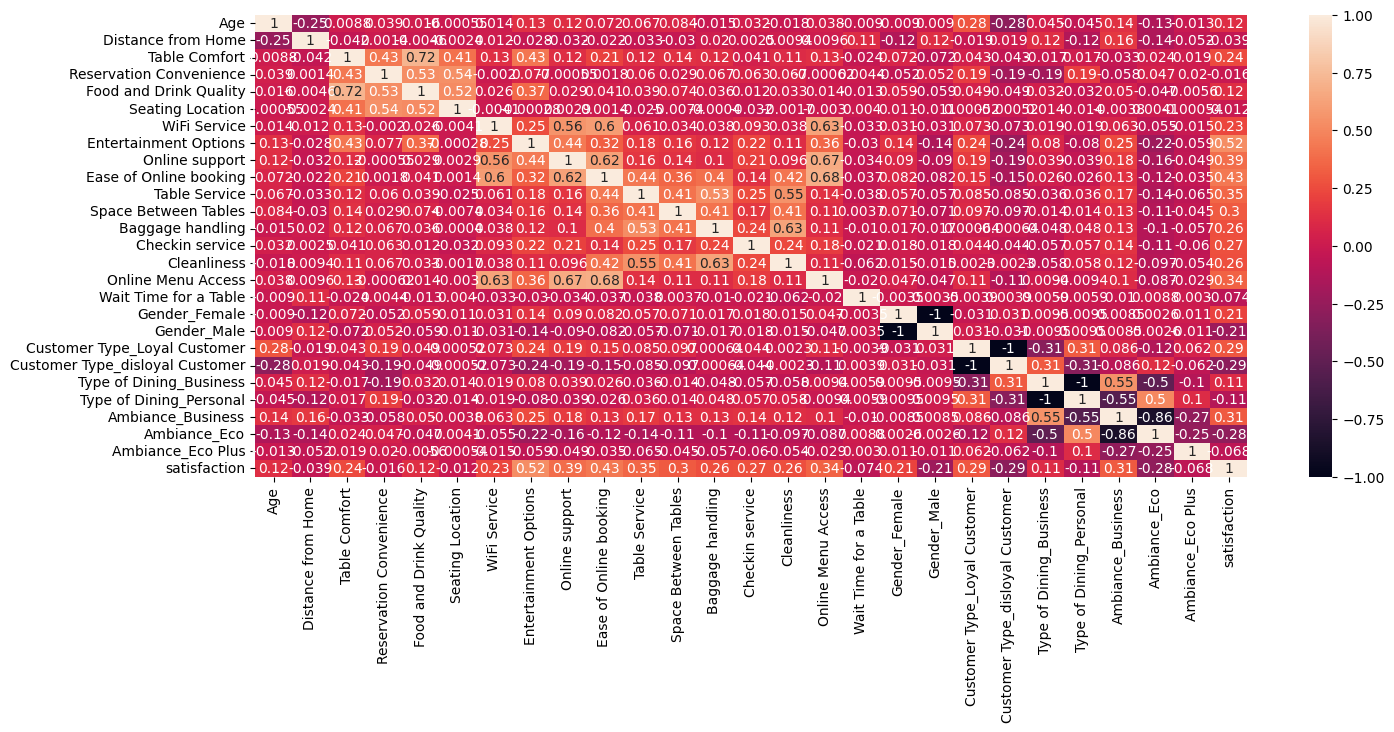

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(data=df_finall.corr() ,
                annot=True ,annot_kws={"size":10}) # no more data obtained

In [ ]:
df_finall.to_csv('./df_prepared.csv',index=False) # df encoded and undivided

- #### Normalize [ Age , Distance from Home , Wait Time for a Table ]
 >- Split data to train , valedation and test
 >- Apply RobustScaler to the train and transform the validation and test  
  

In [ ]:
df_prepared = pd.read_csv('./df_prepared.csv')
df_prepared.head()

,Age,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,Seating Location,WiFi Service,Entertainment Options,Online support,Ease of Online booking,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Dining_Business,Type of Dining_Personal,Ambiance_Business,Ambiance_Eco,Ambiance_Eco Plus,satisfaction
0,65,265,0,0,0,2,2,4,2,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,47,2464,0,0,0,3,0,2,2,3,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,15,2138,0,0,0,3,2,0,2,2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,60,623,0,0,0,3,3,4,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,70,354,0,0,0,3,4,3,4,2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [ ]:
featuers_X = df_prepared.loc[:, df_prepared.columns != "satisfaction"].copy()
label_y = df_prepared.loc[:, "satisfaction"].copy()
featuers_X.head()

,Age,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,Seating Location,WiFi Service,Entertainment Options,Online support,Ease of Online booking,...,Wait Time for a Table,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Dining_Business,Type of Dining_Personal,Ambiance_Business,Ambiance_Eco,Ambiance_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,47,2464,0,0,0,3,0,2,2,3,...,310,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,15,2138,0,0,0,3,2,0,2,2,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,60,623,0,0,0,3,3,4,3,1,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,70,354,0,0,0,3,4,3,4,2,...,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
features_train, features_validation_test, label_train, label_validation_test = \
    train_test_split(featuers_X,label_y,test_size=.2,random_state=42,stratify=label)

In [ ]:
features_validation, features_test, label_validation, label_test = \
    train_test_split(features_validation_test,label_validation_test,test_size=.5,random_state=42)

In [ ]:
features_validation

,Age,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,Seating Location,WiFi Service,Entertainment Options,Online support,Ease of Online booking,...,Wait Time for a Table,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Dining_Business,Type of Dining_Personal,Ambiance_Business,Ambiance_Eco,Ambiance_Eco Plus
24569,47,963,1,1,1,1,5,4,5,5,...,8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
44162,18,1955,1,4,1,3,1,1,1,1,...,40,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
122778,52,3334,5,5,5,5,4,4,5,5,...,32,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
84397,56,2259,3,2,2,2,5,3,3,3,...,8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2086,18,2197,1,2,1,4,5,1,5,5,...,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43785,42,2297,1,2,2,3,2,2,2,2,...,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
109799,39,2453,3,3,4,3,2,5,4,5,...,27,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
122289,47,592,5,3,3,3,1,4,2,5,...,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6556,53,1332,1,5,1,2,3,1,3,3,...,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
len(features_train),len(label_train),len(features_validation),\
len(label_validation),len(features_test),len(label_test)

(103904, 103904, 12988, 12988, 12988, 12988)

In [ ]:
selected_features=featuers[featuers.columns[featuers.nunique() > 6]].columns.tolist()
selected_features

['Age', 'Distance from Home', 'Wait Time for a Table']

In [ ]:
scaler = RobustScaler()
features_train[selected_features] = scaler.fit_transform(features_train[selected_features])
features_validation[selected_features] = scaler.transform(features_validation[selected_features])
features_test[selected_features] = scaler.transform(features_test[selected_features])

In [ ]:
features_validation

,Age,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,Seating Location,WiFi Service,Entertainment Options,Online support,Ease of Online booking,...,Wait Time for a Table,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Dining_Business,Type of Dining_Personal,Ambiance_Business,Ambiance_Eco,Ambiance_Eco Plus
24569,0.291667,-0.813502,1,1,1,1,5,4,5,5,...,0.666667,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
44162,-0.916667,0.023629,1,4,1,3,1,1,1,1,...,3.333333,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
122778,0.500000,1.187342,5,5,5,5,4,4,5,5,...,2.666667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
84397,0.666667,0.280169,3,2,2,2,5,3,3,3,...,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2086,-0.916667,0.227848,1,2,1,4,5,1,5,5,...,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43785,0.083333,0.312236,1,2,2,3,2,2,2,2,...,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
109799,-0.041667,0.443882,3,3,4,3,2,5,4,5,...,2.250000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
122289,0.291667,-1.126582,5,3,3,3,1,4,2,5,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6556,0.541667,-0.502110,1,5,1,2,3,1,3,3,...,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
features_train.to_csv('./df_features_train.csv',index=False)
features_validation.to_csv('./df_features_validation.csv',index=False)
features_test.to_csv('./df_features_test.csv',index=False)
label_train.to_csv('./df_label_train.csv',index=False)
label_validation.to_csv('./df_label_validation.csv',index=False)
label_test.to_csv('./df_label_test.csv',index=False)

## 6. <a name="6">Training Dataset </a>
(<a href="#0">Go to top</a>)

 -  Train a Random Forest Classifier
  -         Note: Scaling the features doesn't necessarily improve the performance of a Random Forest model
 - Conduct feature importance for feature selection
 - Perform a Grid Search to find the best parameters for the Random Forest model



In [ ]:
features_train = pd.read_csv('./df_features_train.csv')
features_validation = pd.read_csv('./df_features_validation.csv')
features_test = pd.read_csv('./df_features_test.csv')
label_train = pd.read_csv('./df_label_train.csv')
label_validation = pd.read_csv('./df_label_validation.csv')
label_test = pd.read_csv('./df_label_test.csv')

In [ ]:
features_validation

,Age,Distance from Home,Table Comfort,Reservation Convenience,Food and Drink Quality,Seating Location,WiFi Service,Entertainment Options,Online support,Ease of Online booking,...,Wait Time for a Table,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Dining_Business,Type of Dining_Personal,Ambiance_Business,Ambiance_Eco,Ambiance_Eco Plus
0,0.291667,-0.813502,1,1,1,1,5,4,5,5,...,0.666667,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.916667,0.023629,1,4,1,3,1,1,1,1,...,3.333333,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.500000,1.187342,5,5,5,5,4,4,5,5,...,2.666667,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.666667,0.280169,3,2,2,2,5,3,3,3,...,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.916667,0.227848,1,2,1,4,5,1,5,5,...,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12983,0.083333,0.312236,1,2,2,3,2,2,2,2,...,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
12984,-0.041667,0.443882,3,3,4,3,2,5,4,5,...,2.250000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
12985,0.291667,-1.126582,5,3,3,3,1,4,2,5,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
12986,0.541667,-0.502110,1,5,1,2,3,1,3,3,...,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
len(features_train),len(label_train),len(features_validation),\
len(label_validation),len(features_test),len(label_test)

(103904, 103904, 12988, 12988, 12988, 12988)

In [ ]:
classifier = RandomForestClassifier(n_jobs=-1,random_state=42)
classifier = classifier.fit(features_train, label_train)

In [ ]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(features_validation, label_validation)))
print("The accuracy of the classifier on the train set is ", (classifier.score(features_train, label_train)))

The accuracy of the classifier on the validation set is  0.960117031105636
The accuracy of the classifier on the train set is  1.0


In [ ]:
df_important_features=pd.DataFrame({'column':features_train.columns, \
                    'importance':classifier.feature_importances_}).sort_values('importance', ascending=False)
important_features = df_important_features[:20]['column'].values.tolist()
df_important_features,important_features

(                             column  importance
 7             Entertainment Options    0.180281
 2                     Table Comfort    0.135104
 9            Ease of Online booking    0.073952
 8                    Online support    0.069734
 10                    Table Service    0.036523
 15               Online Menu Access    0.036402
 4            Food and Drink Quality    0.036055
 11             Space Between Tables    0.035313
 1                Distance from Home    0.032962
 0                               Age    0.030843
 12                 Baggage handling    0.028415
 20  Customer Type_disloyal Customer    0.028413
 19     Customer Type_Loyal Customer    0.028352
 13                  Checkin service    0.026651
 23                Ambiance_Business    0.025768
 18                      Gender_Male    0.024179
 14                      Cleanliness    0.024163
 17                    Gender_Female    0.022793
 3           Reservation Convenience    0.020879
 22          Type of

###  

In [ ]:
classifier2 = RandomForestClassifier(n_jobs=-1, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}


grid_search = GridSearchCV(classifier2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(features_train, label_train.values.ravel())

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
best_classifier = grid_search.best_estimator_
validation_accuracy = best_classifier.score(features_validation, label_validation)
print("Accuracy on the validation set with best hyperparameters:", validation_accuracy) #useless

Accuracy on the validation set with best hyperparameters: 0.9604250076994149


In [ ]:
df_new_features_train=features_train[important_features]
df_new_features_train.head()

,Entertainment Options,Table Comfort,Ease of Online booking,Online support,Table Service,Online Menu Access,Food and Drink Quality,Space Between Tables,Distance from Home,Age,Baggage handling,Customer Type_disloyal Customer,Customer Type_Loyal Customer,Checkin service,Ambiance_Business,Gender_Male,Cleanliness,Gender_Female,Reservation Convenience,Type of Dining_Personal
0,2,1,4,4,1,4,2,5,0.425316,-0.875000,3,1.0,0.0,2,0.0,0.0,3,1.0,2,0.0
1,2,2,1,5,4,1,2,4,0.981435,-0.291667,3,1.0,0.0,3,0.0,1.0,3,0.0,2,0.0
2,3,3,3,3,1,3,5,5,-0.037975,0.208333,3,0.0,1.0,1,0.0,1.0,4,0.0,5,0.0
3,3,3,2,4,2,2,4,3,-1.415190,-0.125000,3,0.0,1.0,4,1.0,0.0,2,1.0,4,0.0
4,4,4,3,1,1,3,4,5,-0.697890,-0.625000,3,1.0,0.0,3,0.0,0.0,2,1.0,5,0.0


In [ ]:
classifier3 = RandomForestClassifier(n_jobs=-1,random_state=42)
classifier3 = classifier3.fit(df_new_features_train, label_train)

In [ ]:
print("The accuracy of the classifier on the validation set is ", (classifier3.score(features_validation[important_features], label_validation)))
print("The accuracy of the classifier on the train set is ", (classifier3.score(features_train[important_features], label_train))) #not improved

The accuracy of the classifier on the validation set is  0.9563443178318448
The accuracy of the classifier on the train set is  1.0




### 📝 **Conclusions:**

***
- Grid search does not significantly improve accuracy.
- Feature selection does not yield substantial benefits.

***

# Don’t make everything perfect, focus on big picture, remember, progress over perfection

In [ ]:
xgb = XGBClassifier(n_jobs=-1,reg_lambda=1.7,reg_alpha=1.2)
xgb.fit(features_train, label_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print("The accuracy of the classifier on the validation set is ", (xgb.score(features_validation, label_validation)))

The accuracy of the classifier on the validation set is  0.95903911302741


In [ ]:
print("The accuracy of the classifier on the validation set is ", (xgb.score(features_train, label_train)))

The accuracy of the classifier on the validation set is  0.9688943640283338


In [ ]:
lr = LogisticRegression( random_state=42, solver='lbfgs', multi_class='ovr')

# Fit the model
#
lr.fit(features_train, label_train)

LogisticRegression(multi_class='ovr', random_state=42)

In [ ]:
Y_predict = lr.predict(features_validation)

# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy {} %".format(metrics.accuracy_score(label_validation, Y_predict)))

LogisticRegression Accuracy 0.8366184170003079 %
